### Sunrise and Sunset Times Webscraping Project by Jeff Kirkpatrick

#### Problem Statement:
I need the 2023 sunrise and set times for Las Cruces, NM to create a sunrise set table in a weather database. We can use the python requests module along with regular expressions to scrap to a weather website and retrieve the needed information in the format required to load in a SQL database table.

In [1]:
# import Python Requests Module
import requests
import re
import csv

import warnings
warnings.filterwarnings('ignore')

#### Pageanation Operations

The website only displays the sunrise and sunset times a month at a time for the year needed. To get subsequent months, they append the month at the end of the url after the city and before the extension. Therefore, we will substitute each month in the url from a list and save the entire 12 months in the variable 'html'.

In [4]:
# To deal with the pagination for 2023. Cycle through all the months and get url data.
# We need the whole year of 2023. Create a months list to use for pageanation operations.
html = ''
months = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 
          'october', 'november', 'december']

# cycle through all the months on the website and gather the text in the 'html' variable.
for m in months:
    # print(m)
    url = f'https://www.sunrisesunsettime.org/north-america/united-states/las-cruces-{m}.htm'
    #print(url)
    r = requests.get(url)
    #print(r.status_code) # should get 12 '200' status codes indicating each page was accessed successfully.
    #print(r.encoding)
    html += r.text
    # the html string is very long so an output is ommited here.

#### Regular Expression Operations

In [5]:
# Next find the data in the html and remove unwanted data using regular expression replacements.

# create a list of regex expressions we will use to filter and remove unwanted formating data.

REGEX_REPLACEMENTS = [
    (r"Sunrise", ''),
    (r"Sunset", ''),
    (r"Dawn", ''),
    (r"Day Length", ''),
    (r"<th>", ''),
    (r"</th>", ''),
    (r"<td>", ''),
    (r"</td>", ''),
    (r"<span class.*</span>", ''),
    (r'<th class="hide-for-small">Dusk', ''),
    (r'<th class="hide-for-small">Solar noon', '')

]

outList = []

# Now we look for specific tags in each html line that contain the data we need.
for line in html.split('\n'):
    if ('<th>' and '</th>') in line or ('<td>' and '<span' and '</span></td>') in line:
        #print(line)
        for old, new in REGEX_REPLACEMENTS:
            line = re.sub(old, new, line, flags=re.IGNORECASE)
            #print(line)
            newline = re.sub(r"[\n\t]*", "", line) # replace all '\n' and '\t' with blank.
        #print(newline)
        outList.append(newline)
            
# Take a look at the outList.
print(outList)

['', '', '', '', '', '', 'Sat, 31 Dec', '07:09 ', '17:13 ', 'Sun, 1 Jan', '07:09 ', '17:13 ', 'Mon, 2 Jan', '07:09 ', '17:14 ', 'Tue, 3 Jan', '07:10 ', '17:15 ', 'Wed, 4 Jan', '07:10 ', '17:16 ', 'Thu, 5 Jan', '07:10 ', '17:16 ', 'Fri, 6 Jan', '07:10 ', '17:17 ', 'Sat, 7 Jan', '07:10 ', '17:18 ', 'Sun, 8 Jan', '07:10 ', '17:19 ', 'Mon, 9 Jan', '07:10 ', '17:20 ', 'Tue, 10 Jan', '07:10 ', '17:20 ', 'Wed, 11 Jan', '07:10 ', '17:21 ', 'Thu, 12 Jan', '07:10 ', '17:22 ', 'Fri, 13 Jan', '07:10 ', '17:23 ', 'Sat, 14 Jan', '07:09 ', '17:24 ', 'Sun, 15 Jan', '07:09 ', '17:25 ', 'Mon, 16 Jan', '07:09 ', '17:26 ', 'Tue, 17 Jan', '07:09 ', '17:27 ', 'Wed, 18 Jan', '07:09 ', '17:28 ', 'Thu, 19 Jan', '07:08 ', '17:28 ', 'Fri, 20 Jan', '07:08 ', '17:29 ', 'Sat, 21 Jan', '07:08 ', '17:30 ', 'Sun, 22 Jan', '07:07 ', '17:31 ', 'Mon, 23 Jan', '07:07 ', '17:32 ', 'Tue, 24 Jan', '07:07 ', '17:33 ', 'Wed, 25 Jan', '07:06 ', '17:34 ', 'Thu, 26 Jan', '07:06 ', '17:35 ', 'Fri, 27 Jan', '07:05 ', '17:36 ', 'Sat

#### Cleanup Operations

In [6]:
# Process the scraped data.
goutlist = []

while("" in outList): #remove blank elements in outlist
    outList.remove("")

for element in outList: # create a clean list of values
    goutlist.append(element)

print(goutlist)

['Sat, 31 Dec', '07:09 ', '17:13 ', 'Sun, 1 Jan', '07:09 ', '17:13 ', 'Mon, 2 Jan', '07:09 ', '17:14 ', 'Tue, 3 Jan', '07:10 ', '17:15 ', 'Wed, 4 Jan', '07:10 ', '17:16 ', 'Thu, 5 Jan', '07:10 ', '17:16 ', 'Fri, 6 Jan', '07:10 ', '17:17 ', 'Sat, 7 Jan', '07:10 ', '17:18 ', 'Sun, 8 Jan', '07:10 ', '17:19 ', 'Mon, 9 Jan', '07:10 ', '17:20 ', 'Tue, 10 Jan', '07:10 ', '17:20 ', 'Wed, 11 Jan', '07:10 ', '17:21 ', 'Thu, 12 Jan', '07:10 ', '17:22 ', 'Fri, 13 Jan', '07:10 ', '17:23 ', 'Sat, 14 Jan', '07:09 ', '17:24 ', 'Sun, 15 Jan', '07:09 ', '17:25 ', 'Mon, 16 Jan', '07:09 ', '17:26 ', 'Tue, 17 Jan', '07:09 ', '17:27 ', 'Wed, 18 Jan', '07:09 ', '17:28 ', 'Thu, 19 Jan', '07:08 ', '17:28 ', 'Fri, 20 Jan', '07:08 ', '17:29 ', 'Sat, 21 Jan', '07:08 ', '17:30 ', 'Sun, 22 Jan', '07:07 ', '17:31 ', 'Mon, 23 Jan', '07:07 ', '17:32 ', 'Tue, 24 Jan', '07:07 ', '17:33 ', 'Wed, 25 Jan', '07:06 ', '17:34 ', 'Thu, 26 Jan', '07:06 ', '17:35 ', 'Fri, 27 Jan', '07:05 ', '17:36 ', 'Sat, 28 Jan', '07:05 ', '17

In [7]:
# Create a list of tuples with desired values.
tupList = []

for i in range(3, len(goutlist), 3): #don't need Dec 31 last year start at record 3
    tupList.append((goutlist[i].split(','), goutlist[i + 1], goutlist[i + 2]))

print(tupList)

[(['Sun', ' 1 Jan'], '07:09 ', '17:13 '), (['Mon', ' 2 Jan'], '07:09 ', '17:14 '), (['Tue', ' 3 Jan'], '07:10 ', '17:15 '), (['Wed', ' 4 Jan'], '07:10 ', '17:16 '), (['Thu', ' 5 Jan'], '07:10 ', '17:16 '), (['Fri', ' 6 Jan'], '07:10 ', '17:17 '), (['Sat', ' 7 Jan'], '07:10 ', '17:18 '), (['Sun', ' 8 Jan'], '07:10 ', '17:19 '), (['Mon', ' 9 Jan'], '07:10 ', '17:20 '), (['Tue', ' 10 Jan'], '07:10 ', '17:20 '), (['Wed', ' 11 Jan'], '07:10 ', '17:21 '), (['Thu', ' 12 Jan'], '07:10 ', '17:22 '), (['Fri', ' 13 Jan'], '07:10 ', '17:23 '), (['Sat', ' 14 Jan'], '07:09 ', '17:24 '), (['Sun', ' 15 Jan'], '07:09 ', '17:25 '), (['Mon', ' 16 Jan'], '07:09 ', '17:26 '), (['Tue', ' 17 Jan'], '07:09 ', '17:27 '), (['Wed', ' 18 Jan'], '07:09 ', '17:28 '), (['Thu', ' 19 Jan'], '07:08 ', '17:28 '), (['Fri', ' 20 Jan'], '07:08 ', '17:29 '), (['Sat', ' 21 Jan'], '07:08 ', '17:30 '), (['Sun', ' 22 Jan'], '07:07 ', '17:31 '), (['Mon', ' 23 Jan'], '07:07 ', '17:32 '), (['Tue', ' 24 Jan'], '07:07 ', '17:33 '), 

In [8]:
# Get the date, sunrise and sunset values and assign them to variables by indexing through the list of tuples.
outList2 = []

for i in range(len(tupList)):
    date = tupList[i][0][1].strip().split(' ')
    sunrise = tupList[i][1].strip()
    sunset = tupList[i][2].strip()
    outList2.append([date, sunrise, sunset])
    
print(outList2)

[[['1', 'Jan'], '07:09', '17:13'], [['2', 'Jan'], '07:09', '17:14'], [['3', 'Jan'], '07:10', '17:15'], [['4', 'Jan'], '07:10', '17:16'], [['5', 'Jan'], '07:10', '17:16'], [['6', 'Jan'], '07:10', '17:17'], [['7', 'Jan'], '07:10', '17:18'], [['8', 'Jan'], '07:10', '17:19'], [['9', 'Jan'], '07:10', '17:20'], [['10', 'Jan'], '07:10', '17:20'], [['11', 'Jan'], '07:10', '17:21'], [['12', 'Jan'], '07:10', '17:22'], [['13', 'Jan'], '07:10', '17:23'], [['14', 'Jan'], '07:09', '17:24'], [['15', 'Jan'], '07:09', '17:25'], [['16', 'Jan'], '07:09', '17:26'], [['17', 'Jan'], '07:09', '17:27'], [['18', 'Jan'], '07:09', '17:28'], [['19', 'Jan'], '07:08', '17:28'], [['20', 'Jan'], '07:08', '17:29'], [['21', 'Jan'], '07:08', '17:30'], [['22', 'Jan'], '07:07', '17:31'], [['23', 'Jan'], '07:07', '17:32'], [['24', 'Jan'], '07:07', '17:33'], [['25', 'Jan'], '07:06', '17:34'], [['26', 'Jan'], '07:06', '17:35'], [['27', 'Jan'], '07:05', '17:36'], [['28', 'Jan'], '07:05', '17:37'], [['29', 'Jan'], '07:04', '17

In [9]:
# Remove any duplicate values.
outList3 = []

# We can use a list comprehension to remove any duplicate values.
[outList3.append(x) for x in outList2 if x not in outList3]

print(outList3)

[[['1', 'Jan'], '07:09', '17:13'], [['2', 'Jan'], '07:09', '17:14'], [['3', 'Jan'], '07:10', '17:15'], [['4', 'Jan'], '07:10', '17:16'], [['5', 'Jan'], '07:10', '17:16'], [['6', 'Jan'], '07:10', '17:17'], [['7', 'Jan'], '07:10', '17:18'], [['8', 'Jan'], '07:10', '17:19'], [['9', 'Jan'], '07:10', '17:20'], [['10', 'Jan'], '07:10', '17:20'], [['11', 'Jan'], '07:10', '17:21'], [['12', 'Jan'], '07:10', '17:22'], [['13', 'Jan'], '07:10', '17:23'], [['14', 'Jan'], '07:09', '17:24'], [['15', 'Jan'], '07:09', '17:25'], [['16', 'Jan'], '07:09', '17:26'], [['17', 'Jan'], '07:09', '17:27'], [['18', 'Jan'], '07:09', '17:28'], [['19', 'Jan'], '07:08', '17:28'], [['20', 'Jan'], '07:08', '17:29'], [['21', 'Jan'], '07:08', '17:30'], [['22', 'Jan'], '07:07', '17:31'], [['23', 'Jan'], '07:07', '17:32'], [['24', 'Jan'], '07:07', '17:33'], [['25', 'Jan'], '07:06', '17:34'], [['26', 'Jan'], '07:06', '17:35'], [['27', 'Jan'], '07:05', '17:36'], [['28', 'Jan'], '07:05', '17:37'], [['29', 'Jan'], '07:04', '17

#### Write to file Operations

In [10]:
# %% Write data to a csv file in the current directory.
# Give column names for pandas dataframe

with open('sunrise_set_2023.csv', mode='w', newline='') as suntimes:
    writer = csv.writer(suntimes)
    writer.writerow(['Month', 'Day', 'Sunrise', 'Sunset'])
    for i in range(len(outList3)):
        writer.writerow([outList3[i][0][1], outList3[i][0][0], outList3[i][1], outList3[i][2]])

Now we can import the .csv file and create a pandas data frame.

In [11]:
import numpy as np
import pandas as pd

df = pd.read_csv('sunrise_set_2023.csv')
df

,Month,Day,Sunrise,Sunset
0,Jan,1,07:09,17:13
1,Jan,2,07:09,17:14
2,Jan,3,07:10,17:15
3,Jan,4,07:10,17:16
4,Jan,5,07:10,17:16
...,...,...,...,...
360,Dec,27,07:08,17:10
361,Dec,28,07:08,17:11
362,Dec,29,07:08,17:11
363,Dec,30,07:09,17:12


### Feature Engineering Operations

We can add a year column so we can do some datetime calculations later.

In [12]:
df['Year'] = '2023'
df

,Month,Day,Sunrise,Sunset,Year
0,Jan,1,07:09,17:13,2023
1,Jan,2,07:09,17:14,2023
2,Jan,3,07:10,17:15,2023
3,Jan,4,07:10,17:16,2023
4,Jan,5,07:10,17:16,2023
...,...,...,...,...,...
360,Dec,27,07:08,17:10,2023
361,Dec,28,07:08,17:11,2023
362,Dec,29,07:08,17:11,2023
363,Dec,30,07:09,17:12,2023


We can view the datatypes of each column and change them to datetime as required

In [13]:
df.dtypes

Month      object
Day         int64
Sunrise    object
Sunset     object
Year       object
dtype: object

Now we can change the month format from str to number by applying datetime operation below.

In [14]:
import datetime
df.Month = df.Month.apply(lambda x: datetime.datetime.strptime(x, '%b').month)
df.Month
#for month in months:
#    month_num = datetime.datetime.strptime(month, '%B').month
#    print(month_num)

0       1
1       1
2       1
3       1
4       1
       ..
360    12
361    12
362    12
363    12
364    12
Name: Month, Length: 365, dtype: int64

In [15]:
df.dtypes

Month       int64
Day         int64
Sunrise    object
Sunset     object
Year       object
dtype: object

Next we can change the sunrise and sunset series to datetimes to perform difference calculation

In [16]:
df['Date'] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=df.Day))
df

,Month,Day,Sunrise,Sunset,Year,Date
0,1,1,07:09,17:13,2023,2023-01-01
1,1,2,07:09,17:14,2023,2023-01-02
2,1,3,07:10,17:15,2023,2023-01-03
3,1,4,07:10,17:16,2023,2023-01-04
4,1,5,07:10,17:16,2023,2023-01-05
...,...,...,...,...,...,...
360,12,27,07:08,17:10,2023,2023-12-27
361,12,28,07:08,17:11,2023,2023-12-28
362,12,29,07:08,17:11,2023,2023-12-29
363,12,30,07:09,17:12,2023,2023-12-30


Now we can create a subset dataframe with to_datetime for Sunrise and Sunset times and calculate the hours of sunlight each day

In [17]:
df_sr_ss = df[['Date', 'Sunrise', 'Sunset']]
df_sr_ss

,Date,Sunrise,Sunset
0,2023-01-01,07:09,17:13
1,2023-01-02,07:09,17:14
2,2023-01-03,07:10,17:15
3,2023-01-04,07:10,17:16
4,2023-01-05,07:10,17:16
...,...,...,...
360,2023-12-27,07:08,17:10
361,2023-12-28,07:08,17:11
362,2023-12-29,07:08,17:11
363,2023-12-30,07:09,17:12


We need to convert each sunrise and sunset time to datetime format to get the timedelta. It doesn't matter about the year because we only need the hours, minutes and seconds difference from each series.

In [18]:
df_sr_ss['sr'] = df_sr_ss.Sunrise.apply(lambda x: datetime.datetime.strptime(x, '%H:%M'))
df_sr_ss['ss'] = df_sr_ss.Sunset.apply(lambda x: datetime.datetime.strptime(x, '%H:%M'))
df_sr_ss

,Date,Sunrise,Sunset,sr,ss
0,2023-01-01,07:09,17:13,1900-01-01 07:09:00,1900-01-01 17:13:00
1,2023-01-02,07:09,17:14,1900-01-01 07:09:00,1900-01-01 17:14:00
2,2023-01-03,07:10,17:15,1900-01-01 07:10:00,1900-01-01 17:15:00
3,2023-01-04,07:10,17:16,1900-01-01 07:10:00,1900-01-01 17:16:00
4,2023-01-05,07:10,17:16,1900-01-01 07:10:00,1900-01-01 17:16:00
...,...,...,...,...,...
360,2023-12-27,07:08,17:10,1900-01-01 07:08:00,1900-01-01 17:10:00
361,2023-12-28,07:08,17:11,1900-01-01 07:08:00,1900-01-01 17:11:00
362,2023-12-29,07:08,17:11,1900-01-01 07:08:00,1900-01-01 17:11:00
363,2023-12-30,07:09,17:12,1900-01-01 07:09:00,1900-01-01 17:12:00


We can convert the timedeltas to seconds and minutes for plotting purposes. Using hours will not show much variation so minutes will be prefered.

In [19]:
df['Hrs_Sunlight'] = df_sr_ss.ss - df_sr_ss.sr
df['Sec_Sunlight'] = df.Hrs_Sunlight.dt.seconds
df['Min_Sunlight'] = df['Sec_Sunlight'].apply(lambda x: int(x / 60))


In [20]:
df


,Month,Day,Sunrise,Sunset,Year,Date,Hrs_Sunlight,Sec_Sunlight,Min_Sunlight
0,1,1,07:09,17:13,2023,2023-01-01,0 days 10:04:00,36240,604
1,1,2,07:09,17:14,2023,2023-01-02,0 days 10:05:00,36300,605
2,1,3,07:10,17:15,2023,2023-01-03,0 days 10:05:00,36300,605
3,1,4,07:10,17:16,2023,2023-01-04,0 days 10:06:00,36360,606
4,1,5,07:10,17:16,2023,2023-01-05,0 days 10:06:00,36360,606
...,...,...,...,...,...,...,...,...,...
360,12,27,07:08,17:10,2023,2023-12-27,0 days 10:02:00,36120,602
361,12,28,07:08,17:11,2023,2023-12-28,0 days 10:03:00,36180,603
362,12,29,07:08,17:11,2023,2023-12-29,0 days 10:03:00,36180,603
363,12,30,07:09,17:12,2023,2023-12-30,0 days 10:03:00,36180,603


We can look at the amount of sunlight we will get by month at our location for the year 2023. The barplot below shows us that we will get about 200 extra minutes of sunlight in May, June and July barring any cloudy weather or any other weather phenomenon that may obscure the sun.

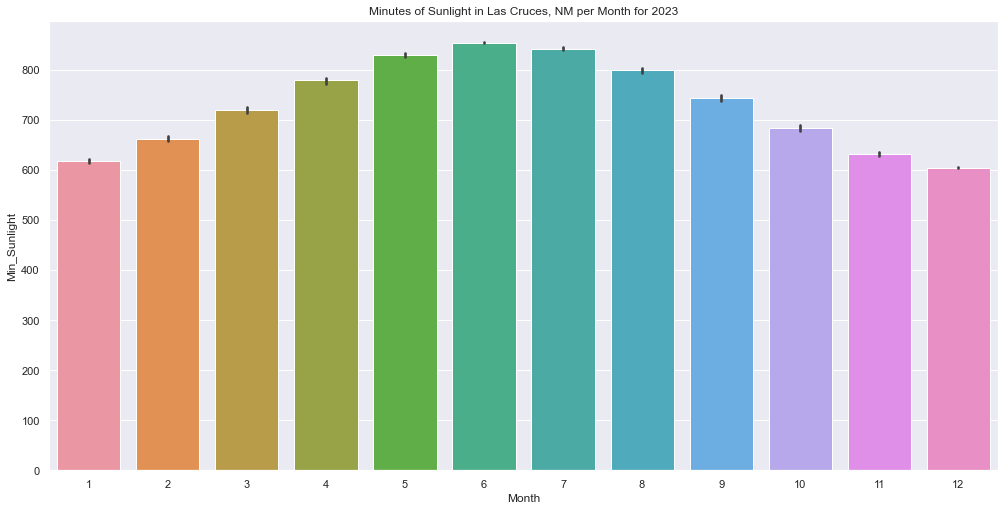

In [21]:
import seaborn as sns
sns.set(rc={'figure.figsize':(17,8.27)})
g = sns.barplot(data = df, x='Month', y='Min_Sunlight');
g.set_title("Minutes of Sunlight in Las Cruces, NM per Month for 2023");


A boxplot will show us the range of sunlight per month for the year 2023. This will be helpful to determine how well solar panels will perform during different times of the year. 

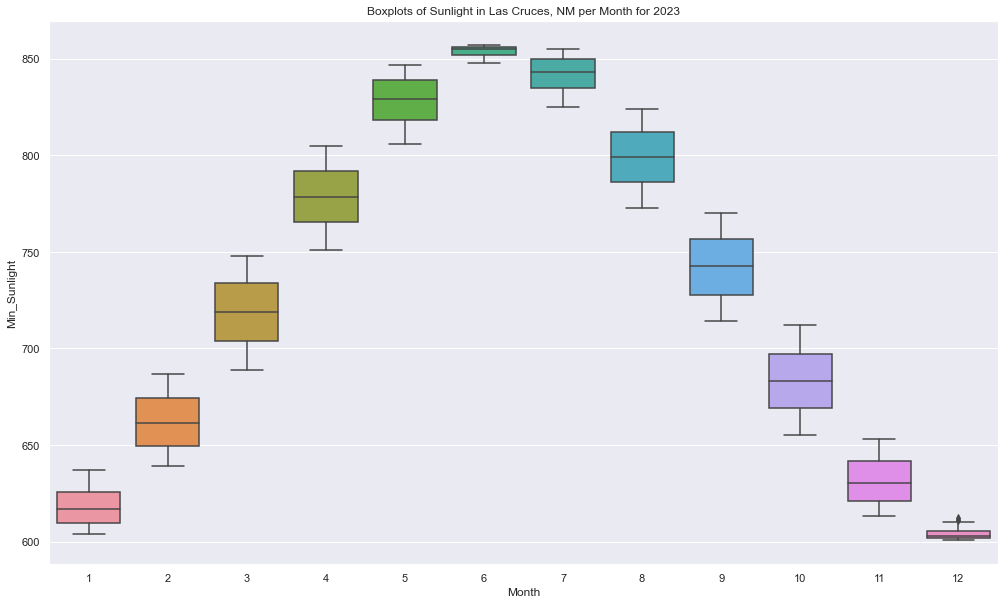

In [22]:
sns.set(rc={'figure.figsize':(17,10)})
g = sns.boxplot(data = df, x='Month', y='Min_Sunlight');
g.set_title("Boxplots of Sunlight in Las Cruces, NM per Month for 2023");

Additional analysis can be done with this data and predicted weather patterns to determine how stormy weather may affect Solar Panel performance even though we expect a certain amount of sunlight throughout the year. However, that additional analysis is beyond the scope of this project given the current time constraints.